### Predicting Australian Rainfall Tomorrow

In [1]:
import warnings
warnings.filterwarnings('ignore')

from math import sqrt
from scipy import stats
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import acquire as a
import prepare as p
import model as m

### Executive Summary

Executive Summary
The purpose of this notebook is to acquire, prep, explore a csv file downloaded from kaggle.com that contains Australian rainfall data and use it to predict whether it will rain tomorrow (the day after each observations recorded date)
target variable: raintom
After visual exploration and statistical testing the features that were inputted into our models were

 - Humidity3pm
 - raintod
 - Rainfall
 - Humidity9am
 - Pressure3pm
 - Pressure9am

Our most successful model that was used on our Out-of-sample (test) dataframe was the K Neareast Neighbor model which performed with the folling metrics:

Accuracy: 86.61%
True Positive Rate: 55.21%
True Negative Rate: 95.54%
False Positive Rate: 4.45%
False Negative Rate: 44.78%
Overall the modeling and project was a success and you can follow the steps below to reproduce it!

Link to dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv

### Acquire


Acquire
Acquire the dataset from kaggle.com where each reservation represents rainfall in a day in Australia 

link to dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv

In [2]:
df = a.get_bmw_data() ## using our acquire function to bring over the data from our local csv

In [3]:
df.head() ## previewing dataframe

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
## looking at our data shape 
df.shape

(145460, 23)

Looks like we have a good amount of observations let's look at some numerical statistics



In [5]:
a.acquire_stats(df) ## using our acquire function to provide numerical statistics

,count,mean,std,min,25%,50%,75%,max,range
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9,42.4
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1,52.9
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0,129.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0,100.0


In [6]:
## looking at our columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
a.summarize_df(df) ## using the acquire function to provide a summary of the variables

Info on Columns and Datatypes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 1

Distribution of Location



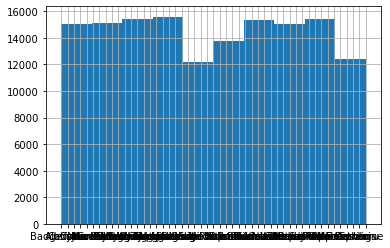

--------------------
Distribution of MinTemp



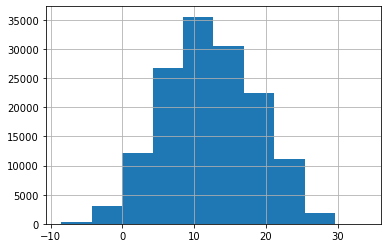

--------------------
Distribution of MaxTemp



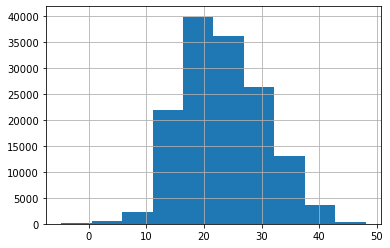

--------------------
Distribution of Rainfall



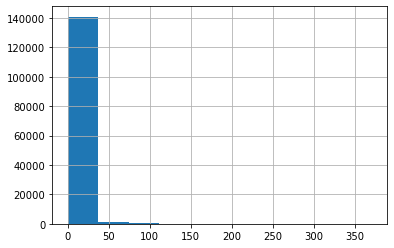

--------------------
Distribution of Sunshine



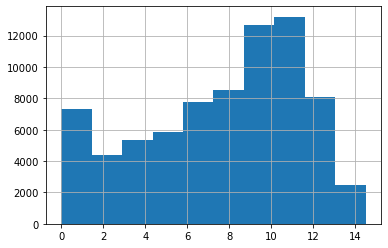

--------------------
Distribution of RainToday



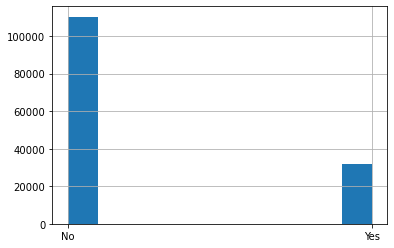

--------------------
Distribution of RainTomorrow



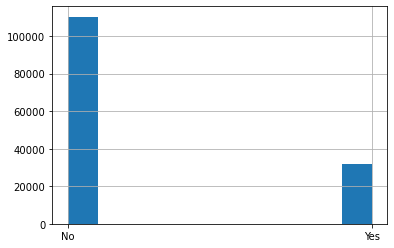

--------------------


In [8]:
## using the acquire funciton to look at distributions
a.univariate_distributions(df)

### Acquire Takeaways

When looking at the distribution of variables there are normal distributions MaxTemp, MinTemp, and slightly normal distributions in the Sunshine column.

When looking at the datatypes there are correct datatypes for our numerical and object variables. It also looks like there are several categorical options that can be split up and used to create more features for modeling.

### Prepare

In [9]:
df = p.drop_duplicates_and_nulls(df) ## using the prepare function to drop duplicates and nulls

In [10]:
df.duplicated().sum() ## <-- quality assurance check

0

In [11]:
df.isnull().sum() ## <-- quality assurance check

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [12]:
## now we need to determine what to do with our null values

## let us start by looking at our data shape again

df.shape

(112925, 19)

In [13]:
df = p.strip_strings(df) ## using the prepare function to strip the object columns of potential whitespace

In [14]:
df.head() ## previewing dataframe

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [15]:
df = p.create_features(df) ## using the prepare function to create features

In [16]:
df.head() ## previewing new features

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,raintom,raintod,month,weekday
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,1007.7,1007.1,16.9,21.8,No,No,0,0,12,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,1010.6,1007.8,17.2,24.3,No,No,0,0,12,1
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,1007.6,1008.7,21.0,23.2,No,No,0,0,12,2
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,1017.6,1012.8,18.1,26.5,No,No,0,0,12,3
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,1010.8,1006.0,17.8,29.7,No,No,0,0,12,4


Visualizing pressure to help create low pressure and high pressure categorical columns



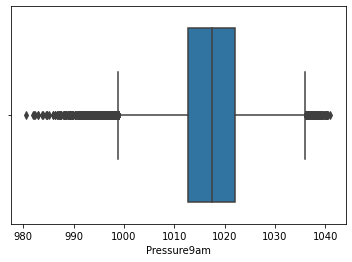

Visualizing pressure to help create low pressure and high pressure categorical columns



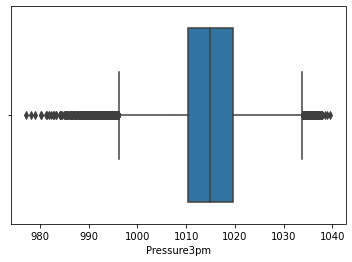

Visualizing temperature to make high temp and low temp categorical columns



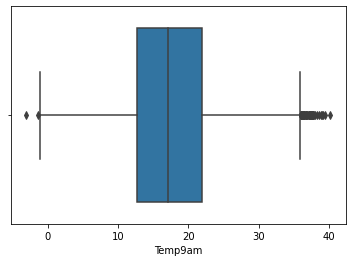

Visualizing temperature to make high temp and low temp categorical columns



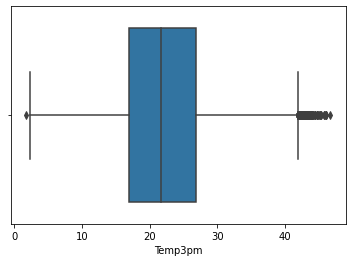

In [17]:
df = p.create_bins(df) ## using the prepare script to create high and low temperature

## and pressure columns for each time of the day

In [18]:
df.head() ## previewing the dataframe

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,month,weekday,low_pressure9am,high_pressure9am,low_pressure3pm,high_pressure3pm,high_temp9am,low_temp9am,high_temp3pm,low_temp3pm
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,12,0,1,0,1,0,1,0,0,1
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,12,1,1,0,1,0,1,0,1,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,12,2,1,0,1,0,1,0,1,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,12,3,0,1,1,0,1,0,1,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,12,4,1,0,1,0,1,0,1,0


### Prepare: Splitting Data

In [19]:
train, validate, test = p.split_data(df)

Making Sure Our Shapes Look Good
Train: (63238, 31), Validate: (27102, 31), Test: (22585, 31)


In [20]:
train.head() ## previewing train split

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,month,weekday,low_pressure9am,high_pressure9am,low_pressure3pm,high_pressure3pm,high_temp9am,low_temp9am,high_temp3pm,low_temp3pm
141520,2015-05-04,Darwin,19.2,32.0,0.0,WNW,28.0,SSE,WNW,6.0,...,5,0,1,0,1,0,1,0,1,0
41328,2014-02-23,Williamtown,18.2,24.9,0.0,SSE,39.0,SSE,E,24.0,...,2,6,0,1,0,1,1,0,0,1
87387,2009-06-06,Cairns,17.5,27.1,0.0,NE,28.0,WNW,NE,2.0,...,6,5,0,1,1,0,1,0,1,0
130412,2010-01-26,Hobart,14.2,24.7,0.0,WNW,63.0,NNW,SSW,28.0,...,1,1,1,0,1,0,1,0,0,1
59164,2011-10-19,Bendigo,8.3,28.7,0.0,N,44.0,NE,N,13.0,...,10,2,0,1,0,1,1,0,1,0


In [21]:
validate.head() ## previewing validate split

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,month,weekday,low_pressure9am,high_pressure9am,low_pressure3pm,high_pressure3pm,high_temp9am,low_temp9am,high_temp3pm,low_temp3pm
116731,2015-01-10,PearceRAAF,15.9,30.7,0.0,SE,59.0,ESE,E,30.0,...,1,5,0,1,1,0,1,0,1,0
69010,2013-09-12,Melbourne,8.5,16.0,2.4,SSE,48.0,SSW,S,22.0,...,9,3,0,1,0,1,0,1,0,1
56773,2013-09-26,Ballarat,7.4,12.3,18.0,W,83.0,W,WSW,50.0,...,9,3,1,0,1,0,0,1,0,1
6984,2011-08-24,Cobar,7.2,23.8,0.0,ESE,20.0,E,SE,13.0,...,8,2,0,1,0,1,0,1,0,1
66506,2015-08-02,MelbourneAirport,5.3,14.1,0.0,WNW,52.0,N,WNW,19.0,...,8,6,1,0,1,0,0,1,0,1


In [22]:
test.head() ## previewing test split

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,month,weekday,low_pressure9am,high_pressure9am,low_pressure3pm,high_pressure3pm,high_temp9am,low_temp9am,high_temp3pm,low_temp3pm
43554,2011-10-04,Wollongong,11.6,16.6,0.0,SSW,43.0,SSW,S,28.0,...,10,1,0,1,0,1,0,1,0,1
21165,2009-02-16,NorfolkIsland,21.2,28.1,10.0,NNW,30.0,NNE,NW,13.0,...,2,0,1,0,1,0,1,0,1,0
48747,2016-09-23,Canberra,5.5,18.2,0.2,SSW,48.0,S,SSE,31.0,...,9,4,0,1,1,0,0,1,0,1
107066,2013-05-13,Woomera,8.2,17.2,0.0,SW,39.0,SSW,SW,22.0,...,5,0,0,1,0,1,0,1,0,1
10468,2013-01-11,CoffsHarbour,20.7,32.8,0.6,NNE,67.0,N,NNE,22.0,...,1,4,1,0,1,0,1,0,1,0


### Prepare Takeaways
We have made several one hot encoded columns to explore for to use as potential modeling features from our categorical columns.

Columns made:

 - month
 - weekday
 - low_pressure9am & 3pm
 - high_pressure9am & 3pm
 - high_temp9am & 3pm
 - low_temp9am & 3pm

The train, validate, test splits look consistent with the correct dataframe shapes and I am ready to explore the train dataframe for to look for features that drive whether it will rain in the future days of Australia

Nothing was done to remove outliers in this dataset we removed all nulls, starting with columns that had more than 50 % null values.

### Explore

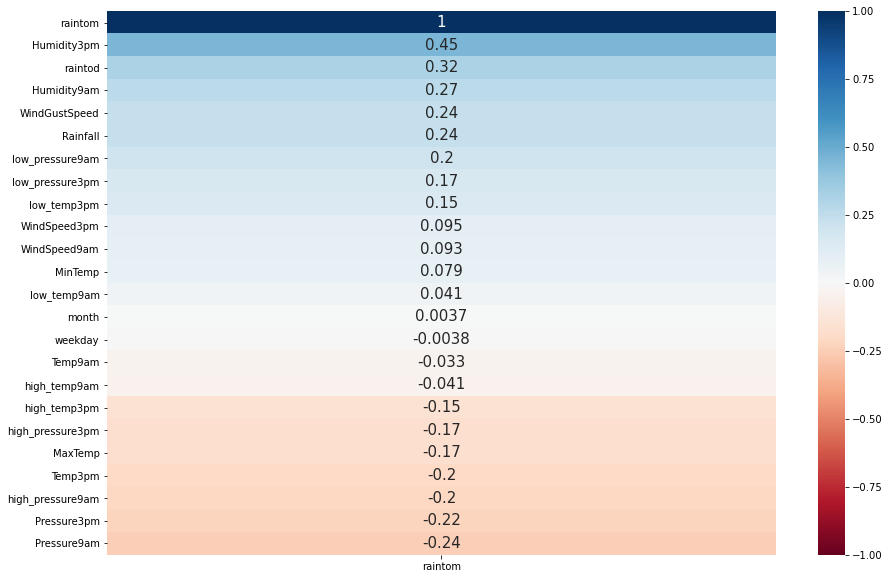

In [23]:
## making a heap map to look at correlations with is_fraud for the train data set
## helping me choose which features to use in my model

plt.figure(figsize = (15,10))  
sns.heatmap(train.corr()[['raintom']].sort_values(by='raintom', ascending = False), 
            cmap = 'RdBu', vmax = 1, vmin = -1, center = 0, annot = True, annot_kws={"size": 15} )
plt.show()

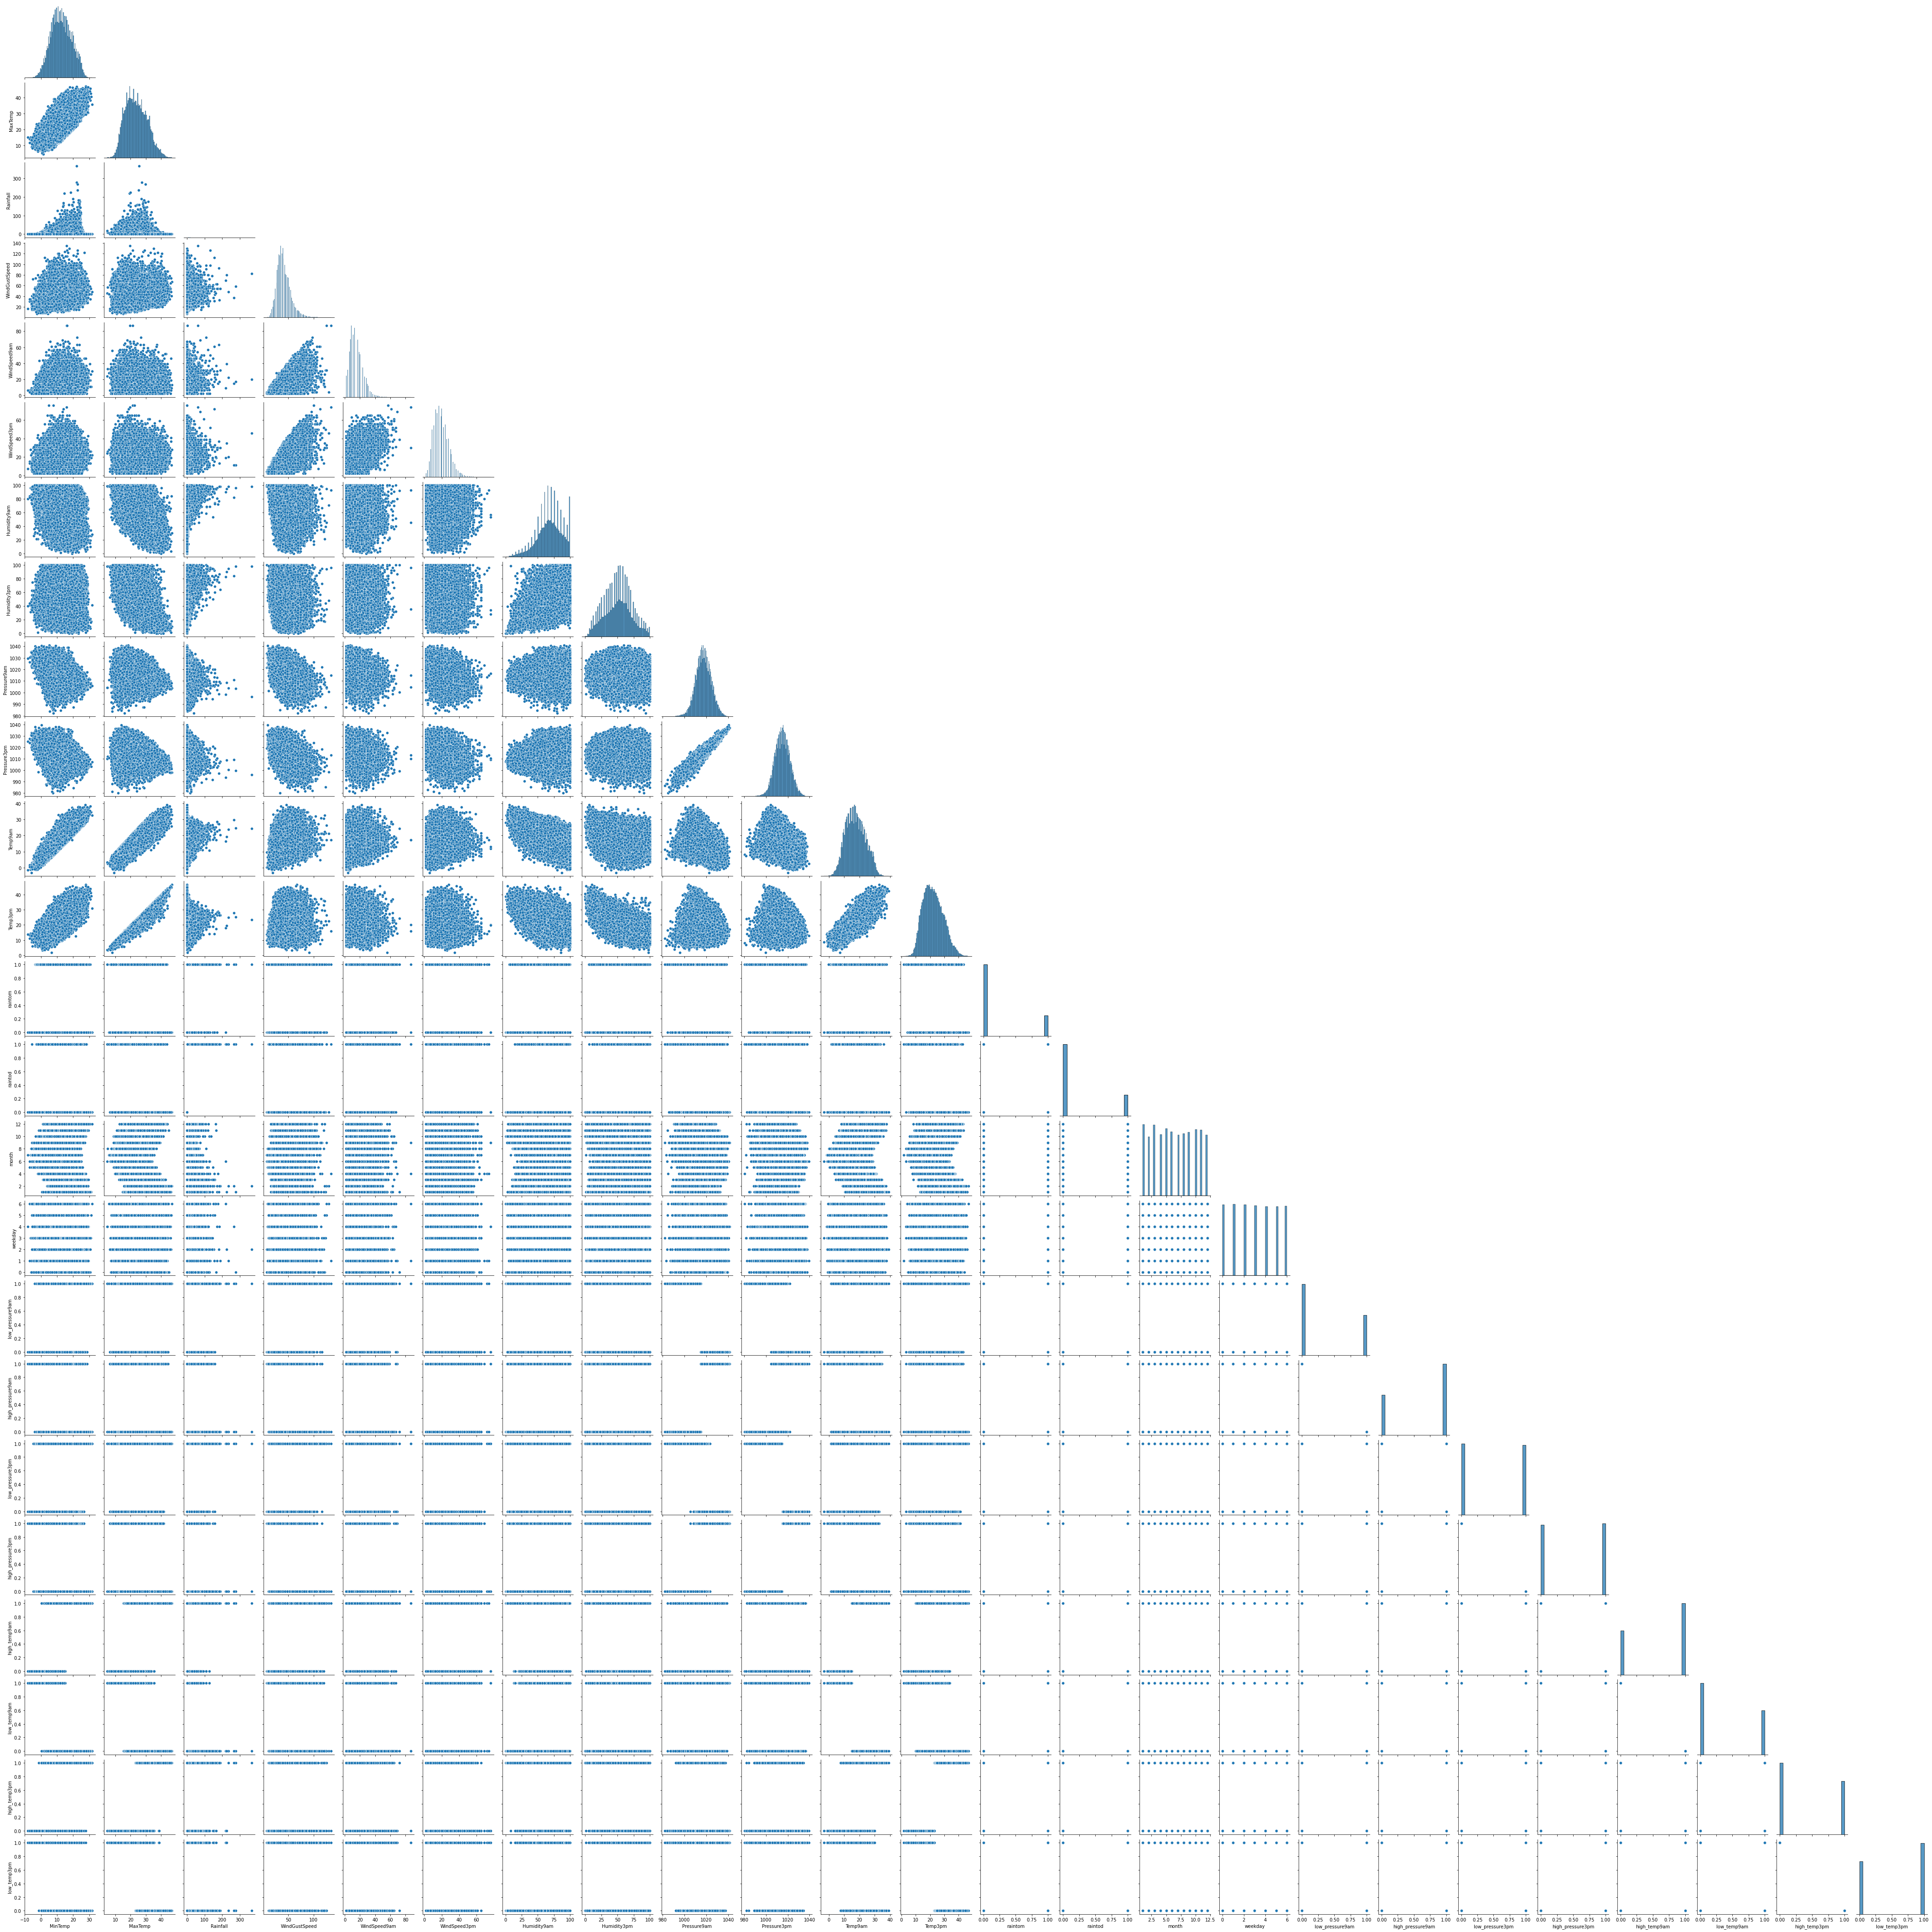

In [24]:
sns.pairplot(data = train, corner = True) ## looking at our variable relationships
plt.show()

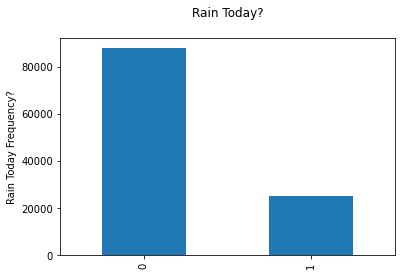

In [25]:
df['raintom'].value_counts().plot.bar()
plt.ylabel('Rain Today Frequency?')
plt.title('Rain Today?\n')
plt.show()

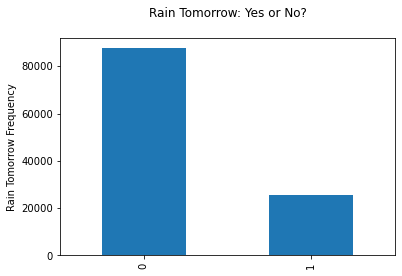

In [26]:
df['raintod'].value_counts().plot.bar()
plt.ylabel('Rain Tomorrow Frequency')
plt.title('Rain Tomorrow: Yes or No?\n')
plt.show()

<Figure size 1440x1440 with 0 Axes>

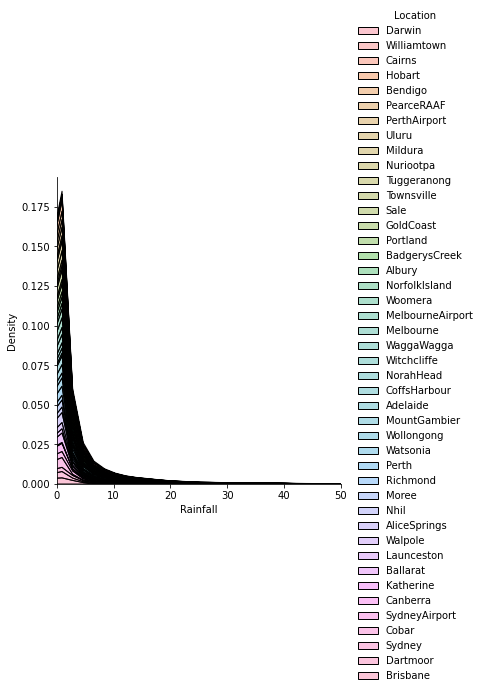

In [27]:
# histogram with hue and stacking
plt.figure(figsize = (20,20))
sns.displot(data = train, x = 'Rainfall', hue = 'Location', multiple = 'stack', 
            alpha = 0.4, kind = 'kde')
plt.xlim(0,50)
plt.show()

<Figure size 1440x1440 with 0 Axes>

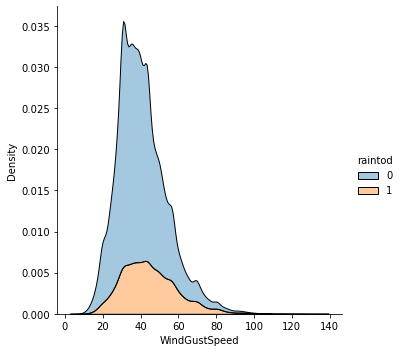

In [28]:
# histogram with hue and stacking
plt.figure(figsize = (20,20))
sns.displot(data = train, x = 'WindGustSpeed', hue = 'raintod', multiple = 'stack', 
            alpha = 0.4, kind = 'kde')
plt.show()

<Figure size 1440x1440 with 0 Axes>

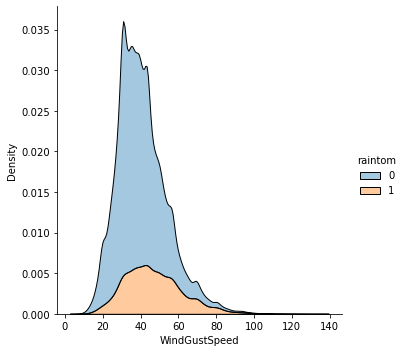

In [29]:
# histogram with hue and stacking
plt.figure(figsize = (20,20))
sns.displot(data = train, x = 'WindGustSpeed', hue = 'raintom', multiple = 'stack', 
            alpha = 0.4, kind = 'kde')

plt.show()

### Explore Takeaways



 - Humidity3pm
 - raintod
 - Rainfall
 - Humidity9am
 - Pressure3pm
 - Pressure9am

### Modeling

In [30]:

## Setting up X and y's by dropping target variable from X's and setting them to y

## also dropping unneccessary columns for predicting target variable


X_train, y_train = train.drop(columns = ['raintom','RainToday', 'RainTomorrow', 'Date']), train.raintom
X_validate, y_validate = validate.drop(columns = ['raintom','RainToday', 'RainTomorrow', 'Date']), validate.raintom
X_test, y_test = test.drop(columns = ['raintom','RainToday', 'RainTomorrow', 'Date']), test.raintom

In [31]:
y_train.head() ## previewing y split

141520    0
41328     1
87387     0
130412    0
59164     0
Name: raintom, dtype: int64

In [32]:
## Turning all my y's into dataframe

y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [33]:
y_train.head() ## previewing our y_train dataframe

,raintom
141520,0
41328,1
87387,0
130412,0
59164,0


In [34]:
X_train.head() ## previewing

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,month,weekday,low_pressure9am,high_pressure9am,low_pressure3pm,high_pressure3pm,high_temp9am,low_temp9am,high_temp3pm,low_temp3pm
141520,Darwin,19.2,32.0,0.0,WNW,28.0,SSE,WNW,6.0,19.0,...,5,0,1,0,1,0,1,0,1,0
41328,Williamtown,18.2,24.9,0.0,SSE,39.0,SSE,E,24.0,20.0,...,2,6,0,1,0,1,1,0,0,1
87387,Cairns,17.5,27.1,0.0,NE,28.0,WNW,NE,2.0,13.0,...,6,5,0,1,1,0,1,0,1,0
130412,Hobart,14.2,24.7,0.0,WNW,63.0,NNW,SSW,28.0,31.0,...,1,1,1,0,1,0,1,0,0,1
59164,Bendigo,8.3,28.7,0.0,N,44.0,NE,N,13.0,22.0,...,10,2,0,1,0,1,1,0,1,0


### Selecting Features

In [35]:
features = [
    'Humidity3pm',
    'raintod',
    'Rainfall',
    'Humidity9am',
    'Pressure3pm',
    'Pressure9am'
]

In [36]:
features

['Humidity3pm',
 'raintod',
 'Rainfall',
 'Humidity9am',
 'Pressure3pm',
 'Pressure9am']

In [37]:
X_train = X_train[features]
X_validate = X_validate[features]
X_test = X_test[features]

In [38]:
X_train.head() ## previewing

,Humidity3pm,raintod,Rainfall,Humidity9am,Pressure3pm,Pressure9am
141520,37.0,0,0.0,69.0,1010.3,1013.2
41328,86.0,0,0.0,63.0,1021.7,1022.8
87387,68.0,0,0.0,76.0,1011.5,1015.1
130412,60.0,0,0.0,72.0,1008.8,1006.2
59164,29.0,0,0.0,52.0,1023.4,1027.9


In [39]:
from imblearn.over_sampling import SMOTE

## using an oversampling technique to make the train x and y's have equal positive and
## negative cases

smote = SMOTE(random_state = 123)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [40]:
y_train_smote.value_counts() ## <-- quality assurance check

raintom
1          49221
0          49221
dtype: int64

### Determining Basline: Modeling

In [41]:
train.raintom.value_counts() ## doing value counts to look at what should be our baseline

0    49221
1    14017
Name: raintom, dtype: int64

In [42]:
train['baseline'] = 0 ## making our baseline column
train.baseline

141520    0
41328     0
87387     0
130412    0
59164     0
         ..
47538     0
144358    0
93965     0
13504     0
123518    0
Name: baseline, Length: 63238, dtype: int64

In [43]:
clas_rep =pd.DataFrame(classification_report(train.raintom, train.baseline, 
                                             output_dict=True)).T
clas_rep

,precision,recall,f1-score,support
0,0.778345,1.000000,0.875359,49221.000000
1,0.000000,0.000000,0.000000,14017.000000
accuracy,0.778345,0.778345,0.778345,0.778345
macro avg,0.389173,0.500000,0.437680,63238.000000
weighted avg,0.605821,0.778345,0.681332,63238.000000


In [44]:
base_recall = 0
print(f'The baseline recall is: {base_recall}')

##represents days it did not rain tomorrow

The baseline recall is: 0


### Train Model Tests

#### Decision Tree Classifier

In [45]:
model = DecisionTreeClassifier(random_state = 123, max_depth = 3)   #making a decision tree model
model.fit(X_train_smote, y_train_smote)              # fitting the model to train df's
 
print(f'The baseline recall is: {base_recall:.2%}') # printing out the basleline accuracy for comparison
m.evaluate(X_train_smote, y_train_smote, model)      # printing out model scores on train df

The baseline recall is: 0.00%

    The accuracy for our model is 75.4952%
    The True Positive Rate is 63.231%,    The False Positive Rate is 12.241%,
    The True Negative Rate is 87.759%,    The False Negative Rate is 36.769%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 43196,False positive: 6025
actual_fraud,False Negative: 18098,True Positive: 31123



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.704735,0.877593,0.781722,49221.000000
fraud,0.837811,0.632311,0.720698,49221.000000
accuracy,0.754952,0.754952,0.754952,0.754952
macro avg,0.771273,0.754952,0.751210,98442.000000
weighted avg,0.771273,0.754952,0.751210,98442.000000


#### Random Forest Model

In [46]:
forest_model = RandomForestClassifier()   # making a random forest model
forest_model.fit(X_train_smote, y_train_smote)       # fitting the model to train

print(f'The baseline recall is: {base_recall:.2%}')   # printing out the baseline for comparison
m.evaluate(X_train_smote, y_train_smote, forest_model)   #printing out model scores for train

The baseline recall is: 0.00%

    The accuracy for our model is 99.9929%
    The True Positive Rate is 99.990%,    The False Positive Rate is 0.004%,
    The True Negative Rate is 99.996%,    The False Negative Rate is 0.010%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 49219,False positive: 2
actual_fraud,False Negative: 5,True Positive: 49216



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.999898,0.999959,0.999929,49221.000000
fraud,0.999959,0.999898,0.999929,49221.000000
accuracy,0.999929,0.999929,0.999929,0.999929
macro avg,0.999929,0.999929,0.999929,98442.000000
weighted avg,0.999929,0.999929,0.999929,98442.000000


#### K Nearest Neighbor

#### Logistic Regression Model

In [47]:
knn_model = KNeighborsClassifier(n_neighbors = 5) #making a k nearest neighbor model 
knn_model.fit(X_train_smote, y_train_smote) #fitting the model to train

print(f'The baseline recall is: {base_recall:.2%}') #printing out the baseline accuracy for comparison
m.evaluate(X_train_smote, y_train_smote, knn_model) #using evaluate function from evaluation file to print out scores

The baseline recall is: 0.00%

    The accuracy for our model is 89.4506%
    The True Positive Rate is 96.682%,    The False Positive Rate is 17.781%,
    The True Negative Rate is 82.219%,    The False Negative Rate is 3.318%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 40469,False positive: 8752
actual_fraud,False Negative: 1633,True Positive: 47588



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.961213,0.822190,0.886283,49221.000000
fraud,0.844657,0.966823,0.901621,49221.000000
accuracy,0.894506,0.894506,0.894506,0.894506
macro avg,0.902935,0.894506,0.893952,98442.000000
weighted avg,0.902935,0.894506,0.893952,98442.000000


#### Logistic Regression Model

In [48]:
logic_model = LogisticRegression(random_state = 123)  ##making a logistic regression model
logic_model.fit(X_train_smote, y_train_smote) ##fitting model to train

print(f'The baseline recall is: {base_recall:.2%}')
m.evaluate(X_train_smote, y_train_smote, logic_model)

The baseline recall is: 0.00%

    The accuracy for our model is 74.0223%
    The True Positive Rate is 73.188%,    The False Positive Rate is 25.144%,
    The True Negative Rate is 74.856%,    The False Negative Rate is 26.812%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 36845,False positive: 12376
actual_fraud,False Negative: 13197,True Positive: 36024



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.736282,0.748563,0.742371,49221.000000
fraud,0.744298,0.731883,0.738038,49221.000000
accuracy,0.740223,0.740223,0.740223,0.740223
macro avg,0.740290,0.740223,0.740205,98442.000000
weighted avg,0.740290,0.740223,0.740205,98442.000000


### Validate Tests

#### Logistic Regression Validate

In [49]:
logic_model = LogisticRegression(random_state = 123)  ##making a logistic regression model
logic_model.fit(X_validate, y_validate) ##fitting model to train

print(f'The baseline recall is: {base_recall:.2%}')
m.evaluate(X_validate, y_validate, logic_model)

The baseline recall is: 0.00%

    The accuracy for our model is 83.4883%
    The True Positive Rate is 42.382%,    The False Positive Rate is 4.728%,
    The True Negative Rate is 95.272%,    The False Negative Rate is 57.618%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 20068,False positive: 996
actual_fraud,False Negative: 3479,True Positive: 2559



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.852253,0.952716,0.899688,21064.000000
fraud,0.719831,0.423816,0.533514,6038.000000
accuracy,0.834883,0.834883,0.834883,0.834883
macro avg,0.786042,0.688266,0.716601,27102.000000
weighted avg,0.822751,0.834883,0.818109,27102.000000


#### KNN Validate 

In [50]:
knn_model = KNeighborsClassifier(n_neighbors = 5) #making a k nearest neighbor model 
knn_model.fit(X_validate, y_validate) #fitting the model to train

print(f'The baseline recall is: {base_recall:.2%}') #printing out the baseline accuracy for comparison
m.evaluate(X_validate, y_validate, knn_model) #using evaluate function from evaluation file to print out scores

The baseline recall is: 0.00%

    The accuracy for our model is 86.6726%
    The True Positive Rate is 56.840%,    The False Positive Rate is 4.776%,
    The True Negative Rate is 95.224%,    The False Negative Rate is 43.160%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 20058,False positive: 1006
actual_fraud,False Negative: 2606,True Positive: 3432



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.885016,0.952241,0.917398,21064.000000
fraud,0.773321,0.568400,0.655212,6038.000000
accuracy,0.866726,0.866726,0.866726,0.866726
macro avg,0.829169,0.760320,0.786305,27102.000000
weighted avg,0.860132,0.866726,0.858986,27102.000000


#### Decision Tree Validate

In [51]:
model = DecisionTreeClassifier(random_state = 123, max_depth = 3)   #making a decision tree model
model.fit(X_validate, y_validate)              # fitting the model to train df's
 
print(f'The baseline recall is: {base_recall:.2%}') # printing out the basleline accuracy for comparison
m.evaluate(X_validate, y_validate, model)      # printing out model scores on train df

The baseline recall is: 0.00%

    The accuracy for our model is 83.6138%
    The True Positive Rate is 39.583%,    The False Positive Rate is 3.765%,
    The True Negative Rate is 96.235%,    The False Negative Rate is 60.417%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 20271,False positive: 793
actual_fraud,False Negative: 3648,True Positive: 2390



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.847485,0.962353,0.901274,21064.000000
fraud,0.750864,0.395826,0.518382,6038.000000
accuracy,0.836138,0.836138,0.836138,0.836138
macro avg,0.799175,0.679090,0.709828,27102.000000
weighted avg,0.825959,0.836138,0.815970,27102.000000


### Out of Sample Test on KNN Model

In [52]:
knn_model = KNeighborsClassifier(n_neighbors = 5) #making a k nearest neighbor model 
knn_model.fit(X_test, y_test) #fitting the model to train

print(f'The baseline recall is: {base_recall:.2%}') #printing out the baseline accuracy for comparison
m.evaluate(X_test, y_test, knn_model) #using evaluate function from evaluation file to print out scores

The baseline recall is: 0.00%

    The accuracy for our model is 86.9250%
    The True Positive Rate is 56.769%,    The False Positive Rate is 4.580%,
    The True Negative Rate is 95.420%,    The False Negative Rate is 43.231%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 16814,False positive: 807
actual_fraud,False Negative: 2146,True Positive: 2818



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.886814,0.954202,0.919275,17621.00000
fraud,0.777379,0.567687,0.656188,4964.00000
accuracy,0.869250,0.869250,0.869250,0.86925
macro avg,0.832097,0.760945,0.787732,22585.00000
weighted avg,0.862761,0.869250,0.861451,22585.00000
